In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd
import skops.io as skio

In [25]:
model = skio.load("cluster1/census_model.skops", trusted=True)

with open("cluster1/census.csv", 'r') as f:
    data = f.read()

C:\Users\TTTTTT\PycharmProjects\kaggle_defcon_ai\venv\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator OrdinalEncoder from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\TTTTTT\PycharmProjects\kaggle_defcon_ai\venv\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator FunctionTransformer from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\TTTTTT\PycharmProjects\kaggle_defcon_ai\venv\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estim

In [70]:
# preprocessing
data = data.split()
data = [d.split(',') for d in data]
df = pd.DataFrame(data=data[1:], columns=data[0], )

df = df.astype(
    {'capital.gain': 'int64',
     'age': 'int64',
     'workclass': 'string',
     'education.num': 'int64',
     'marital.status': 'string',
     'occupation': 'string',
     'relationship': 'string',
     'race': 'string',
     'sex': 'string',
     'capital.loss': 'int64',
     'hours.per.week': 'int64',
     'native.country': 'string',
     'income': 'string',
     'id': 'int64'
     })

In [71]:
df

,id,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,19956,23,Private,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
1,9864,43,Private,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
2,27689,49,Self-emp-not-inc,4,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
3,32524,33,Private,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,<=50K
4,11365,22,Private,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,25,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,17199,23,Private,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
16277,25421,49,Self-emp-not-inc,13,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,70,United-States,<=50K
16278,107,54,Private,10,Married-civ-spouse,Sales,Husband,White,Male,0,2415,50,United-States,>50K
16279,10911,30,Self-emp-inc,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,52,United-States,>50K


In [72]:
def age_groups(x):
    if x <= 20:
        return 20
    elif x <= 30:
        return 30
    elif x <= 40:
        return 40
    elif x <= 50:
        return 50
    elif x <= 60:
        return 60
    elif x <= 70:
        return 70
    elif x <= 80:
        return 80
    elif x <= 90:
        return 90
    else:
        return 100

In [73]:
df['age_group'] = df['age'].apply(lambda x: age_groups(x))

In [74]:
df.describe()

,id,age,education.num,capital.gain,capital.loss,hours.per.week,age_group
count,16281.000000,16281.000000,16281.000000,16281.000000,16281.00000,16281.000000,16281.000000
mean,16216.484430,38.534181,10.083901,1104.433880,89.08040,40.390885,42.972176
std,9413.638449,13.627339,2.572766,7457.186359,408.22874,12.220965,13.989458
min,0.000000,17.000000,1.000000,0.000000,0.00000,1.000000,20.000000
25%,8061.000000,28.000000,9.000000,0.000000,0.00000,40.000000,30.000000
50%,16226.000000,37.000000,10.000000,0.000000,0.00000,40.000000,40.000000
75%,24392.000000,48.000000,12.000000,0.000000,0.00000,45.000000,50.000000
max,32560.000000,90.000000,16.000000,99999.000000,4356.00000,99.000000,90.000000


In [75]:
model.decision_function

<bound method Pipeline.decision_function of Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  ['workclass', 'education.num',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native.country']),
                                                 ('num', 'passthrough',
                                                  ['age', 'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week'])])),
                ('classifier',
                 HistGradientBoostingClassifier(categorical_features=array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64),
                                               

In [76]:
model_fitted = model.fit(df[['age', 'workclass', 'education.num', 'marital.status',
                             'occupation', 'relationship', 'race', 'sex', 'capital.gain',
                             'capital.loss', 'hours.per.week', 'native.country']], df['income'])

In [77]:
preds = model_fitted.predict(df[['age', 'workclass', 'education.num', 'marital.status',
                                 'occupation', 'relationship', 'race', 'sex', 'capital.gain',
                                 'capital.loss', 'hours.per.week', 'native.country']])

In [78]:
df["preds"] = preds

In [82]:
df_upper = df[(df['preds'] == '<=50K')].copy(deep=True)

In [85]:
df_missclassified = df[(df['income'] != df['preds'])].copy(deep=True)

In [86]:
df_missclassified

,id,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_group,preds
6,16231,39,Self-emp-not-inc,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,40,>50K
24,31991,32,Private,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,38,United-States,>50K,40,<=50K
29,21386,66,Self-emp-inc,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K,70,<=50K
34,22317,27,Private,14,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,Hong,>50K,30,<=50K
35,18768,42,Self-emp-not-inc,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,56,United-States,>50K,50,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16246,7690,63,Private,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K,70,>50K
16255,30227,49,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,<=50K,50,>50K
16256,21868,44,Private,11,Separated,Craft-repair,Other-relative,White,Male,0,0,48,United-States,>50K,50,<=50K
16259,14800,61,Self-emp-inc,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K,70,>50K


In [83]:
df_upper

,id,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_group,preds
0,19956,23,Private,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K,30,<=50K
2,27689,49,Self-emp-not-inc,4,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K,50,<=50K
3,32524,33,Private,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,<=50K,40,<=50K
4,11365,22,Private,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,25,United-States,<=50K,30,<=50K
5,294,45,Private,13,Married-civ-spouse,Sales,Husband,White,Male,0,2002,55,United-States,<=50K,50,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16274,9055,18,,6,Never-married,,Other-relative,White,Female,0,0,30,United-States,<=50K,20,<=50K
16275,12119,54,Private,11,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,20,United-States,<=50K,60,<=50K
16276,17199,23,Private,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K,30,<=50K
16277,25421,49,Self-emp-not-inc,13,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,70,United-States,<=50K,50,<=50K


In [14]:
import requests

input_data = [0]


def query(input_data):
    response = requests.post('http://cluster1.advml.com/score', json={'data': input_data})
    return response.json()


query(input_data)

{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}

In [16]:
df_upper

,id,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_group,preds
38,24333,45,Private,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,>50K,50,>50K
104,3201,30,Private,13,Never-married,Tech-support,Not-in-family,White,Female,4787,0,45,United-States,>50K,30,>50K
120,25285,50,Private,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K,50,>50K
147,618,32,Private,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,1902,40,United-States,>50K,40,>50K
212,15060,23,Private,9,Never-married,Tech-support,Own-child,White,Male,0,0,50,United-States,<=50K,30,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16107,9560,46,Federal-gov,10,Divorced,Tech-support,Not-in-family,White,Male,0,0,40,United-States,<=50K,50,<=50K
16210,23375,42,Private,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,45,United-States,>50K,50,>50K
16231,7077,22,Private,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,60,United-States,<=50K,30,<=50K
16236,365,48,Private,15,Married-civ-spouse,Tech-support,Husband,White,Male,0,1977,40,United-States,>50K,50,>50K


<Axes: >

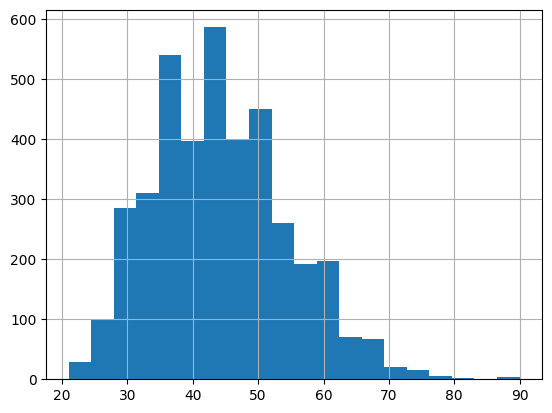

In [15]:
df_upper['age'].hist(bins=20)

<Axes: >

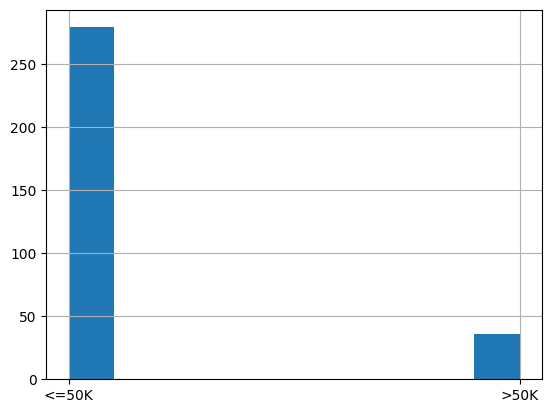

In [31]:
query([0]*162)

{'s': 0.0}

In [89]:
ids_to_add = df[df['occupation'] != 'Tech-support']['id'].to_list()

In [90]:
ids_tech_supp = df[df['occupation'] == 'Tech-support']['id'].to_list()

In [91]:
query(ids_tech_supp)

{'s': 0.5856832971800434}

In [93]:
query(ids_to_add)

{'s': 0.0}

In [97]:
from time import sleep
from requests import JSONDecodeError

starting_value = query(ids_tech_supp)['s']
added_ids = []
j = 0
for i in ids_to_add[1000:]:
    j += 1
    if j % 1000 == 0:
        print(j)
    ids_tech_supp.append(i)
    try:
        s = query(ids_tech_supp)
    except JSONDecodeError:
        sleep(2)
        ids_tech_supp.pop()
        continue
    if s['s'] > starting_value:
        starting_value = s['s']
        added_ids.append(i)
        print(s)
    else:
        ids_tech_supp.pop()

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000


Exception ignored in: <finalize object at 0x201c3b86620; dead>
Traceback (most recent call last):
  File "C:\Users\TTTTTT\AppData\Local\Programs\Python\Python310\lib\weakref.py", line 591, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "C:\Users\TTTTTT\PycharmProjects\kaggle_defcon_ai\venv\lib\site-packages\urllib3\connectionpool.py", line 1176, in _close_pool_connections
    conn.close()
  File "C:\Users\TTTTTT\PycharmProjects\kaggle_defcon_ai\venv\lib\site-packages\urllib3\connection.py", line 272, in close
    super().close()
  File "C:\Users\TTTTTT\AppData\Local\Programs\Python\Python310\lib\http\client.py", line 960, in close
    sock.close()   # close it manually... there may be other refs
  File "C:\Users\TTTTTT\AppData\Local\Programs\Python\Python310\lib\socket.py", line 502, in close
    self._real_close()
  File "C:\Users\TTTTTT\AppData\Local\Programs\Python\Python310\lib\socket.py", line 496, in _real_close
    _ss.close(self)
KeyboardInterrupt: 


KeyboardInterrupt: 

In [99]:
added_ids = []
starting_value = query(ids_tech_supp)['s']
popped_set = set()
while True:
    popped = ids_tech_supp.pop(0)
    print(popped)
    if popped in popped_set:
        break
    popped_set.add(popped)
    s = query(ids_tech_supp)
    if s['s'] > starting_value:
        starting_value = s['s']
        added_ids.append(popped)
        print(s)
    else:
        ids_tech_supp.append(popped)

3201
25285
{'s': 0.5844155844155844}
618
15060
3175
{'s': 0.5856832971800434}
29612
5078
3666
9085
{'s': 0.5869565217391305}
20004
{'s': 0.5882352941176471}
6360
{'s': 0.5895196506550219}
3614
{'s': 0.5908096280087527}
334
15079
{'s': 0.5921052631578947}
4906
{'s': 0.5934065934065934}
25155
24648
14421
18246
18325
9942
{'s': 0.5947136563876652}
4123
{'s': 0.5960264900662252}
1860
27740
{'s': 0.5973451327433629}
1394
{'s': 0.5986696230598669}
15384
{'s': 0.6}
31414
12535
3587
17044
20110
{'s': 0.6013363028953229}
22987
9742
{'s': 0.6026785714285714}
17611
8278
7960
17808
{'s': 0.6040268456375839}
2496
{'s': 0.6053811659192825}
2156
7794
{'s': 0.6067415730337079}
23405
27266
{'s': 0.6081081081081081}
14683
14534
{'s': 0.6094808126410836}
27307
19985
21147
6565
{'s': 0.6108597285067874}
15899
{'s': 0.6122448979591837}
10835
17829
{'s': 0.6136363636363636}
20064
29621
6262
32106
5591
10022
7713
3119
{'s': 0.6150341685649203}
23527
{'s': 0.6164383561643836}
767
{'s': 0.6178489702517163}
829

KeyError: 's'

In [100]:
query(ids_tech_supp)

{'flag': 'gAAAAABlMZW4pNCzMUHR72thR1iFKJxt3HM704wtRqGMSuuz630dEa578tq5B34z9x0Nl2zHs490YI08Uz1cHrU3WSClQ6dFHy-YqZrrOhMAxAN8gZmg3NN1FqOP6aTobpG5DtoYfIn-OLlP011GDY9_8NQlyTY4-fPLdMvkUj1epgfRLOIC2Q4='}

[ 3201 25285   618 15060  3175 29612  5078  3666  9085 20004  6360  3614
   334 15079  4906 25155 24648 14421 18246 18325  9942  4123  1860 27740
  1394 15384 31414 12535  3587 17044 20110 22987  9742 17611  8278  7960
 17808  2496  2156  7794 23405 27266 14683 14534 27307 19985 21147  6565
 15899 10835 17829 20064 29621  6262 32106  5591 10022  7713  3119 23527
   767  8295 17609 10632 31237 22425  4537 19492 16800 29376  2715 17882
 14079 11389 27112 10971  7874 22157   490  4268 27396  4287 25679 25341
 30355 27183 23139 24144 29951 23973 11675 27810  2333  5337 31359 20723
 12283 25550 29363 11549 15242 12371 16701  7049  3346 14008 10396  2173
 18232 12291  5615 21562 21958 18938 19856   570   948 30075 25841 23645
   265  4902 10489 10507 19347  5355   940 25384  1210 20642 31922 17978
  3597 11700 19209  3399   408  1499 31585 25848 10582 10351  6168 10652
 29892 29248 19669  2405 18207 10953  3617 15055 10642 17793 32273 19947
 12868 30981 26727 13572   414 29846   927 24728 17

In [ ]:
df_tech_preds_less_50 = df_upper[df_upper['preds'] == '<=50K']

In [87]:
for col in df_missclassified.columns:
    unq = df_missclassified[col].unique()
    if col == 'id':
        continue
    if col == 'age':
        continue
    for u in unq:
        if len(df_missclassified[df_missclassified[col] == u]) < 160:
            continue
        print(col, u)
        print(query(df_missclassified[(df_missclassified[col] == u)]['id'].to_list()))
        print('\n\n')
        

workclass Self-emp-not-inc
{'s': 0.0021413276231263384}



workclass Private
{'s': 0.01808439383791025}



education.num 13
{'s': 0.007320644216691069}



education.num 10
{'s': 0.01788375558867362}



education.num 9
{'s': 0.004597701149425287}



marital.status Married-civ-spouse
{'s': 0.017308766052484645}



occupation Prof-specialty
{'s': 0.0}



occupation Craft-repair
{'s': 0.0}



occupation Sales
{'s': 0.0}



occupation Exec-managerial
{'s': 0.0}



relationship Husband
{'s': 0.015980331899200985}



relationship Not-in-family
{'s': 0.00392156862745098}



race White
{'s': 0.015424164524421594}



sex Male
{'s': 0.014673913043478261}



sex Female
{'s': 0.012727272727272728}



capital.gain 0
{'s': 0.016299137104506232}



capital.loss 0
{'s': 0.015865384615384615}



hours.per.week 50
{'s': 0.007858546168958742}



hours.per.week 40
{'s': 0.017513134851138354}



native.country United-States
{'s': 0.014485514485514486}



income <=50K
{'s': 0.018497109826589597}



income >5

In [24]:
' '.join(df.columns)

'id age workclass education.num marital.status occupation relationship race sex capital.gain capital.loss hours.per.week native.country income age_group preds'

In [23]:
df[df['occupation'] == '']#.unique()

,id,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_group,preds
13,29277,68,,6,Married-civ-spouse,,Husband,White,Male,0,0,35,United-States,<=50K,70,<=50K
14,14089,30,,3,Married-civ-spouse,,Husband,White,Male,0,0,40,Mexico,<=50K,30,<=50K
70,1750,67,,16,Married-civ-spouse,,Husband,White,Male,20051,0,5,United-States,>50K,70,>50K
71,11383,28,,12,Never-married,,Other-relative,White,Male,0,0,40,United-States,<=50K,30,<=50K
94,26659,63,,9,Married-civ-spouse,,Husband,White,Male,0,0,25,United-States,<=50K,70,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16147,17349,20,,10,Never-married,,Own-child,White,Female,0,0,10,United-States,<=50K,20,<=50K
16151,9222,40,,10,Married-civ-spouse,,Wife,White,Female,0,0,25,United-States,<=50K,40,<=50K
16201,17517,74,,9,Widowed,,Not-in-family,White,Female,0,0,10,United-States,<=50K,80,<=50K
16232,25078,20,,10,Never-married,,Own-child,White,Female,0,0,35,United-States,<=50K,20,<=50K


In [20]:
df_tech_preds_less_50 = df_upper[df_upper['preds'] == '<=50K']

In [13]:
def calc_misclassification(row):
    if (row['income'] == '<=50K') and (row['preds'] == '>50K'):
        return "missclassified higer income"
    elif (row['income'] == '>50K') and (row['preds'] == '<=50K'):
        return "missclassified lower income"
    elif (row['income'] == '<=50K') and (row['preds'] == '<=50K'):
        return "correct lower income"
    elif (row['income'] == '>50K') and (row['preds'] == '>50K'):
        return "correct higher income"
    else:
        return "error"

In [14]:
df['misclassificaton'] = df.apply(lambda row: calc_misclassification(row), axis=1)

In [6]:
from sklearn.preprocessing import LabelEncoder

df_1 = df.copy(deep=True)
for col in df.columns:
    if df[col].dtype == 'string':
        le = LabelEncoder()
        le.fit(df[col])
        df_1[f'{col}_ord'] = le.transform(df[col])

In [7]:
# df_2 = df_1.drop(columns=['income', 'preds'])
df_1.columns

Index(['id', 'age', 'workclass', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income',
       'workclass_ord', 'marital.status_ord', 'occupation_ord',
       'relationship_ord', 'race_ord', 'sex_ord', 'native.country_ord',
       'income_ord'],
      dtype='object')

In [25]:
from sklearn.decomposition import PCA
df_2 = df_1[df_1['income'] == '>50K'].copy(deep=True)
pca = PCA(n_components=2)
dim2 = pca.fit_transform(df.drop(columns=['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income', 'id']))

print(dim2)

[[-1104.27631835   -91.07167891]
 [-1104.27226616   -91.01680477]
 [-1104.27284653   -91.0214341 ]
 ...
 [-1108.55633777  2323.99417373]
 [-1104.27376571   -91.03912148]
 [-1104.27551755   -91.06348971]]


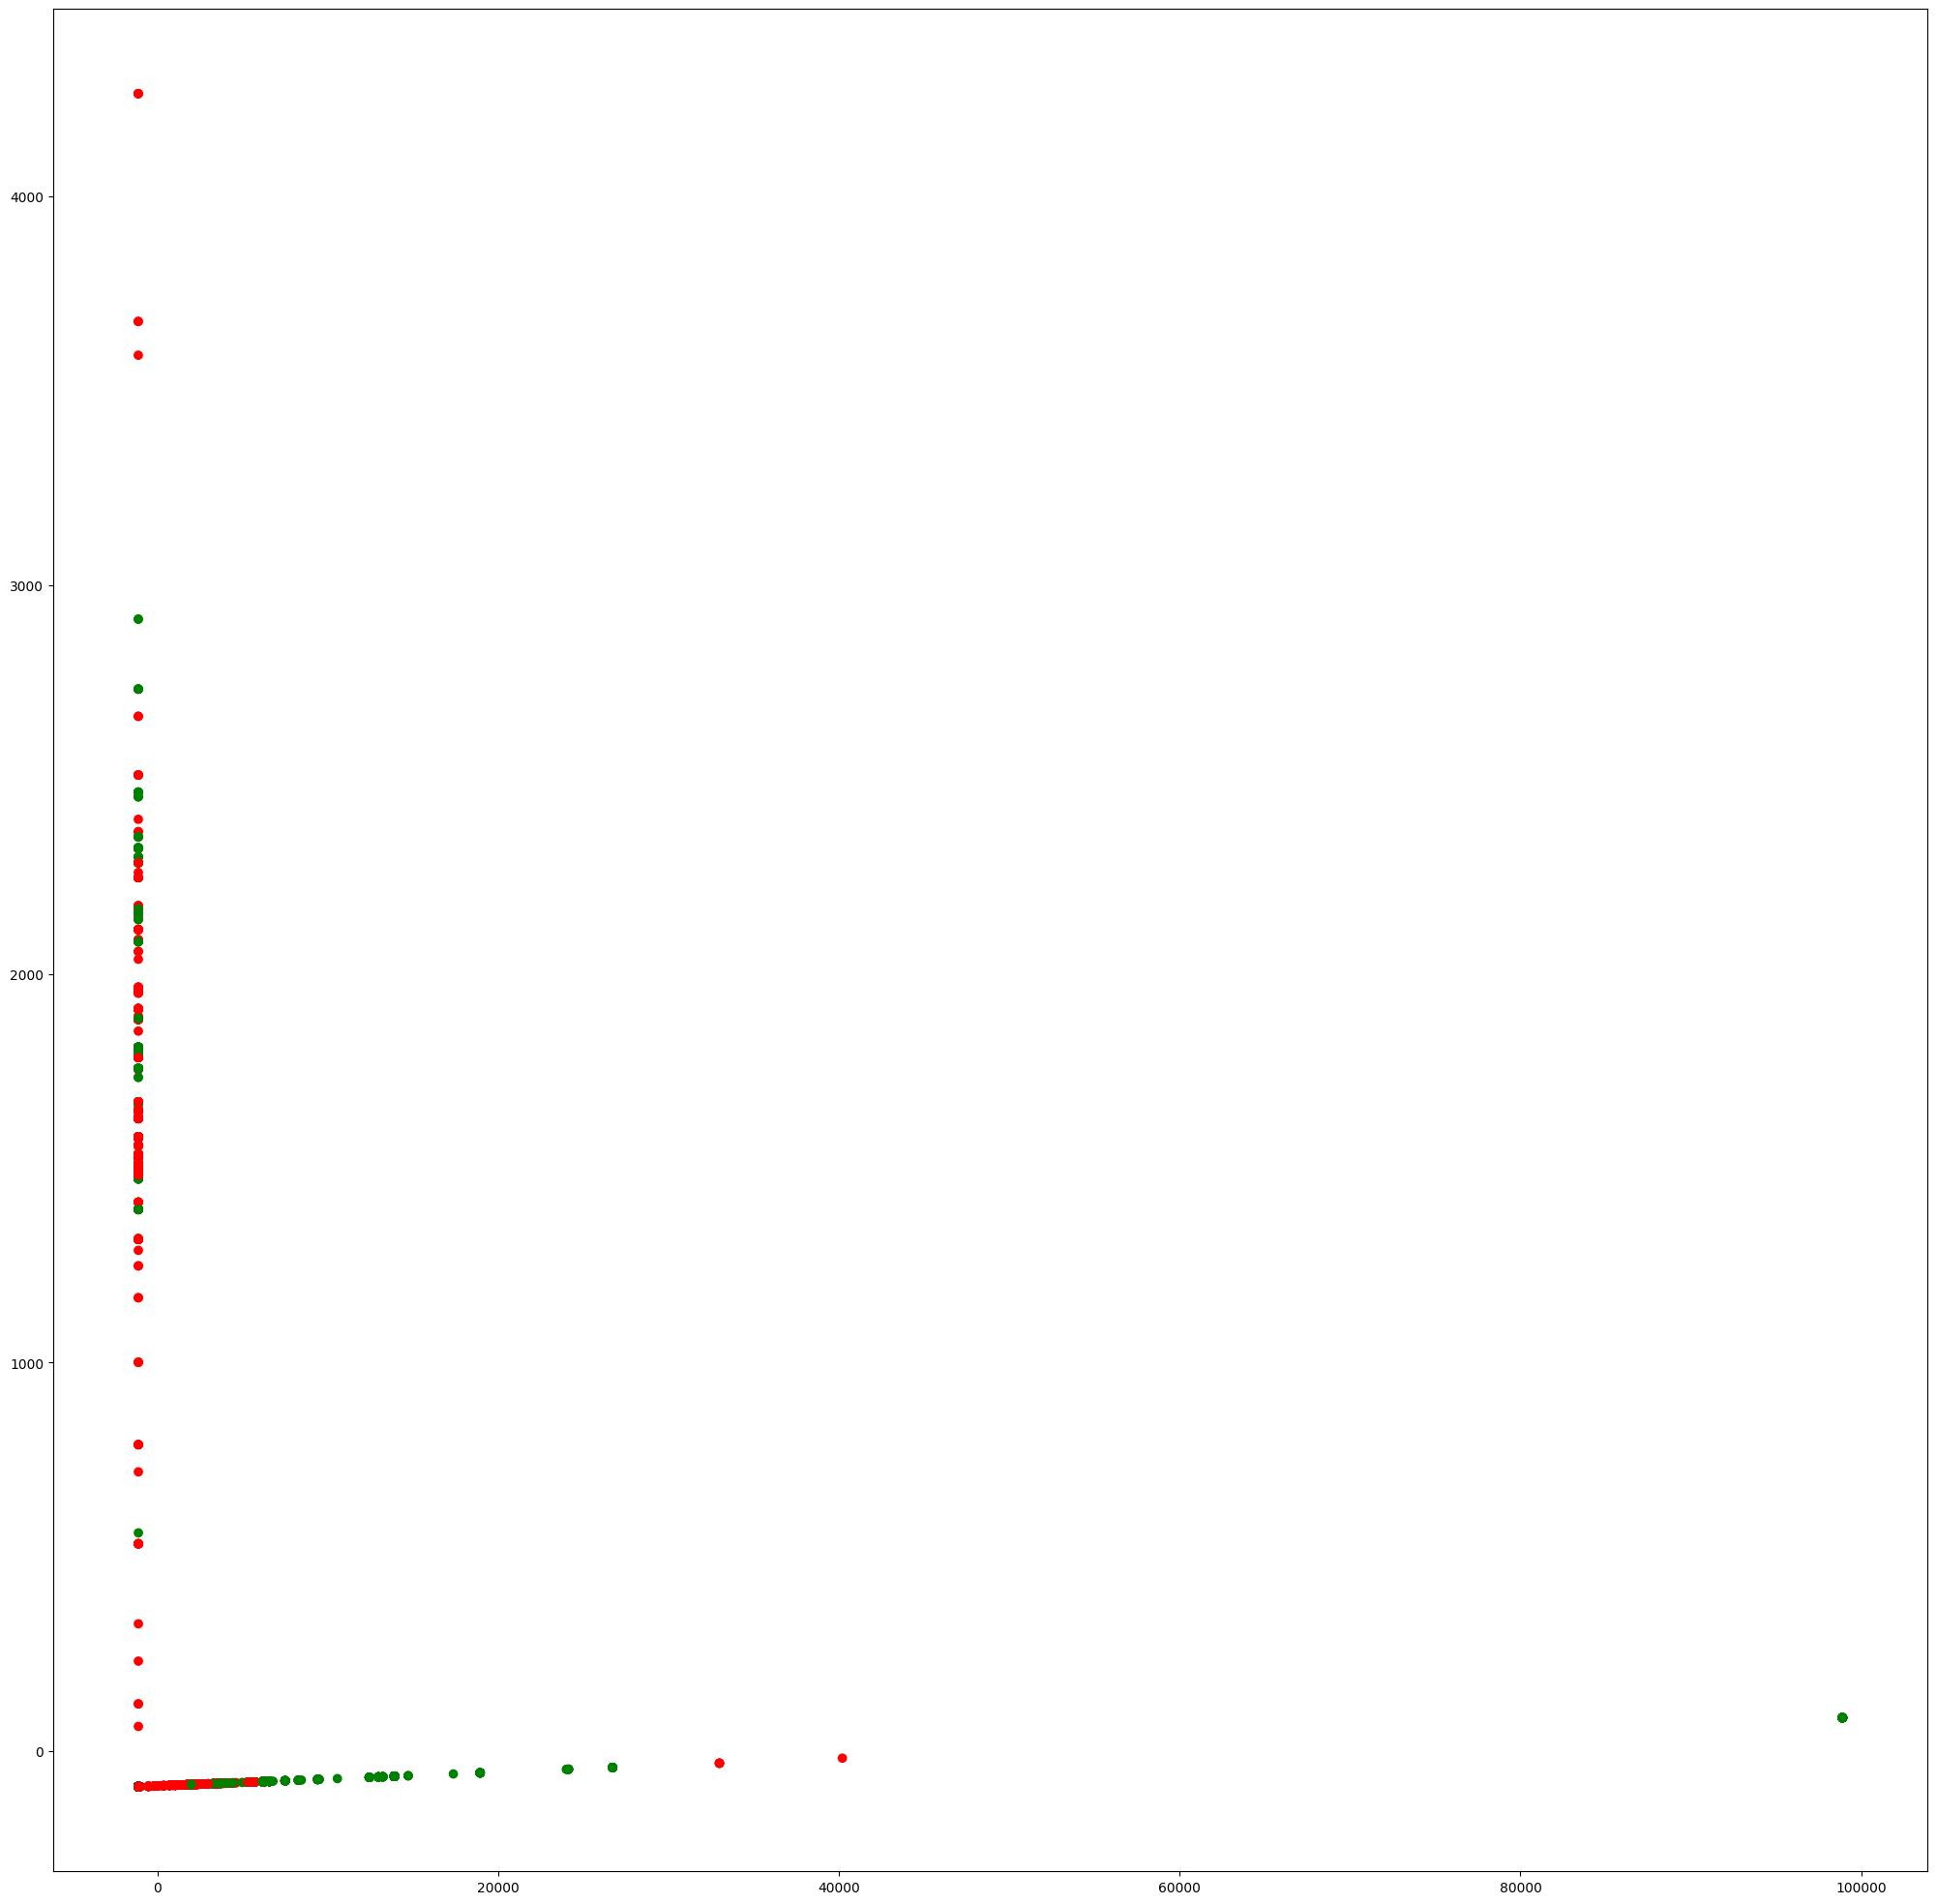

In [26]:
plt.figure(figsize=(25, 25))
colors = {'<=50K': 'red', '>50K': 'green'}
plt.scatter(dim2[:, 0], dim2[:, 1], c=df['income'].map(colors))
# df_2['comp1'] = dim2[:, 0]
# df_2['comp2'] = dim2[:, 1]

In [21]:
query(df_2[df_2['comp1'] < -2000]['id'].tolist())

{'s': 0.013977514433302947}

In [17]:
str(list(df_1.columns))

"['id', 'age', 'workclass', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income', 'preds', 'misclassificaton', 'workclass_ord', 'marital.status_ord', 'occupation_ord', 'relationship_ord', 'race_ord', 'sex_ord', 'native.country_ord', 'income_ord']"

In [21]:
from itertools import combinations
cols = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex',]
column_pairs = list(combinations(cols, 2))

,id,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,preds,misclassificaton
0,19956,23,Private,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K,<=50K,correct lower income
1,9864,43,Private,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K,>50K,correct higher income
2,27689,49,Self-emp-not-inc,4,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K,<=50K,correct lower income
3,32524,33,Private,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,<=50K,<=50K,correct lower income
4,11365,22,Private,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,25,United-States,<=50K,<=50K,correct lower income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,17199,23,Private,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K,<=50K,correct lower income
16277,25421,49,Self-emp-not-inc,13,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,70,United-States,<=50K,<=50K,correct lower income
16278,107,54,Private,10,Married-civ-spouse,Sales,Husband,White,Male,0,2415,50,United-States,>50K,>50K,correct higher income
16279,10911,30,Self-emp-inc,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,52,United-States,>50K,>50K,correct higher income


In [ ]:
for pair in column_pairs:
    print(pair)
    # plot pairs and color by 'misclassification'
    plt.figure(figsize=(10, 10))
    colors = {'correct higher income': 'blue', 'correct lower income': 'green', 'missclassified higer income': 'red', 'missclassified lower income': 'yellow'}
    plt.scatter(df[pair[0]], df[pair[1]], c=df['misclassificaton'].map(colors))
    plt.colorbar()
    plt.show()

In [57]:
query(df[(df['relationship_ord'] == 5)]['id'].to_list())

{'s': 0.01262135922330097}

In [33]:
for col in df.columns:
    if col == 'id':
        continue
    if col.endswith('_ord'):
        continue
    if df[col].dtype != 'string':
        continue
    print(col)
    unq = df[col].unique()
    for i in unq:
        print(i)
        print(query(df[(df[col] == i)]['id'].to_list()))
        print('\n\n')
        with open('results.txt', 'a') as f:
            f.write(f'{col} {i}\n')
            f.write(f'{query(df[(df[col] == i) & (df["income"] == ">50K")]["id"].to_list())}\n')
            f.write('\n\n')

workclass
Private
{'s': 0.008518776077885953}


Self-emp-not-inc
{'s': 0.006501950585175552}


Federal-gov
{'s': 0.006756756756756757}


Local-gov
{'s': 0.008533747090768037}


{'s': 0.00333889816360601}


State-gov
{'s': 0.007675438596491228}


Self-emp-inc
{'s': 0.0035714285714285713}


Without-pay
{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}


Never-worked
{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}


marital.status
Never-married
{'s': 0.008981498113885397}


Married-civ-spouse
{'s': 0.006916351298447083}


Married-spouse-absent
{'s': 0.004081632653061225}


Widowed
{'s': 0.0053404539385847796}


Divorced
{'s': 0.009108910891089108}


Separated
{'s': 0.007905138339920948}


Married-AF-spouse
{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}


occupation
Adm-clerical
{'s': 0.008450704225352112}


Exec-managerial
{'s': 0.006510416666666667}


Sales
{'s': 0.00727449078

In [59]:
len(df[(df['occupation'] == 'Tech-support')]['id'].to_list())

461

In [63]:
sorted_tech_supp = sorted(df[(df['occupation'] == 'Tech-support')]['id'].to_list())

In [65]:
last_value = query(sorted_tech_supp[:162])['s']
starting_ids = sorted_tech_supp[:162]
added_ids = []
for i in range(163, 461):
    s = query(sorted(df[(df['occupation'] == 'Tech-support')]['id'].to_list())[:i])
    if s['s'] > last_value:
        last_value = s['s']
        added_ids.append(sorted_tech_supp[i])
        print(i, s)

163 {'s': 0.26239067055393583}
164 {'s': 0.2653061224489796}
166 {'s': 0.26744186046511625}
168 {'s': 0.26956521739130435}
169 {'s': 0.27246376811594203}
171 {'s': 0.2745664739884393}
172 {'s': 0.2774566473988439}
175 {'s': 0.27873563218390807}
176 {'s': 0.28160919540229884}
177 {'s': 0.28448275862068967}
178 {'s': 0.28735632183908044}
185 {'s': 0.28895184135977336}
187 {'s': 0.2909604519774011}
188 {'s': 0.2937853107344633}
191 {'s': 0.2949438202247191}
192 {'s': 0.29775280898876405}
193 {'s': 0.300561797752809}
194 {'s': 0.30337078651685395}
195 {'s': 0.3061797752808989}
196 {'s': 0.3089887640449438}
197 {'s': 0.31179775280898875}
198 {'s': 0.3146067415730337}
199 {'s': 0.31741573033707865}
200 {'s': 0.3202247191011236}
201 {'s': 0.32303370786516855}
204 {'s': 0.3240223463687151}
205 {'s': 0.3268156424581006}
208 {'s': 0.3277777777777778}
209 {'s': 0.33055555555555555}
210 {'s': 0.3333333333333333}
211 {'s': 0.33611111111111114}
213 {'s': 0.3379501385041551}
214 {'s': 0.3407202216066

In [68]:
print(len(added_ids))

158


In [73]:
added_ids.extend(sorted_tech_supp[0:5])

In [74]:
added_ids

[10396,
 10422,
 10438,
 10507,
 10517,
 10582,
 10632,
 10780,
 10835,
 10923,
 10952,
 11573,
 11700,
 11765,
 12093,
 12107,
 12231,
 12283,
 12291,
 12371,
 12515,
 12535,
 12565,
 12650,
 12689,
 13142,
 13258,
 13572,
 13624,
 13638,
 13713,
 13837,
 13935,
 14008,
 14072,
 14079,
 14133,
 14421,
 14534,
 14757,
 14904,
 14964,
 15060,
 15079,
 15275,
 15384,
 15899,
 16402,
 16480,
 16597,
 16800,
 16801,
 16824,
 16935,
 16984,
 17044,
 17113,
 17303,
 17593,
 17662,
 17808,
 17978,
 18061,
 18207,
 18232,
 18246,
 18325,
 18422,
 18478,
 18869,
 19064,
 19094,
 19347,
 19417,
 19490,
 19492,
 19636,
 19671,
 19798,
 19830,
 19835,
 19876,
 19947,
 19954,
 19985,
 20004,
 20110,
 20425,
 20553,
 20642,
 20690,
 20723,
 20774,
 20877,
 21079,
 21083,
 21088,
 21147,
 21181,
 21227,
 21301,
 21686,
 21753,
 21958,
 22157,
 22377,
 22425,
 22618,
 22987,
 23056,
 23067,
 23109,
 23139,
 23475,
 23514,
 23527,
 24182,
 24216,
 24333,
 24728,
 25016,
 25105,
 25155,
 25161,
 25675,


In [78]:
last_value = query(added_ids)['s']
for i in range(5, 163):
    added_ids2 = added_ids.copy()
    added_ids2.append(sorted_tech_supp[i])
    s = query(added_ids2)
    if s['s'] > last_value:
        last_value = s['s']
        added_ids.append(sorted_tech_supp[i])
        print(i, s)

8 {'s': 0.27941176470588236}
9 {'s': 0.2823529411764706}
11 {'s': 0.2852941176470588}
13 {'s': 0.28823529411764703}
16 {'s': 0.2911764705882353}
20 {'s': 0.29411764705882354}
21 {'s': 0.29705882352941176}
23 {'s': 0.3}
25 {'s': 0.3029411764705882}
27 {'s': 0.3058823529411765}
28 {'s': 0.3088235294117647}
31 {'s': 0.31176470588235294}
33 {'s': 0.31470588235294117}
35 {'s': 0.3176470588235294}
36 {'s': 0.3205882352941177}
41 {'s': 0.3235294117647059}
46 {'s': 0.3264705882352941}
50 {'s': 0.32941176470588235}
52 {'s': 0.3323529411764706}
55 {'s': 0.3352941176470588}
56 {'s': 0.3382352941176471}
57 {'s': 0.3411764705882353}
60 {'s': 0.34411764705882353}
64 {'s': 0.34705882352941175}
65 {'s': 0.35}
67 {'s': 0.35294117647058826}
70 {'s': 0.3558823529411765}
71 {'s': 0.3588235294117647}
73 {'s': 0.36176470588235293}
74 {'s': 0.36470588235294116}
76 {'s': 0.36764705882352944}
77 {'s': 0.37058823529411766}
78 {'s': 0.3735294117647059}
80 {'s': 0.3764705882352941}
81 {'s': 0.37941176470588234}
8

In [77]:
print(added_ids2)

[10396, 10422, 10438, 10507, 10517, 10582, 10632, 10780, 10835, 10923, 10952, 11573, 11700, 11765, 12093, 12107, 12231, 12283, 12291, 12371, 12515, 12535, 12565, 12650, 12689, 13142, 13258, 13572, 13624, 13638, 13713, 13837, 13935, 14008, 14072, 14079, 14133, 14421, 14534, 14757, 14904, 14964, 15060, 15079, 15275, 15384, 15899, 16402, 16480, 16597, 16800, 16801, 16824, 16935, 16984, 17044, 17113, 17303, 17593, 17662, 17808, 17978, 18061, 18207, 18232, 18246, 18325, 18422, 18478, 18869, 19064, 19094, 19347, 19417, 19490, 19492, 19636, 19671, 19798, 19830, 19835, 19876, 19947, 19954, 19985, 20004, 20110, 20425, 20553, 20642, 20690, 20723, 20774, 20877, 21079, 21083, 21088, 21147, 21181, 21227, 21301, 21686, 21753, 21958, 22157, 22377, 22425, 22618, 22987, 23056, 23067, 23109, 23139, 23475, 23514, 23527, 24182, 24216, 24333, 24728, 25016, 25105, 25155, 25161, 25675, 25679, 25695, 26224, 26358, 26361, 26857, 26902, 27112, 27125, 27183, 27266, 27307, 27396, 27551, 27619, 27740, 27945, 28607

In [61]:
query(df[(df['occupation'] == 'Tech-support')]['id'].to_list())

{'s': 0.5856832971800434}

In [54]:
df[(df['occupation'] == 'Tech-support') & (df['id'].isin((21626, 21672, 21686, 21753, 21958, 22157)))]

,id,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2544,22157,40,Private,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
3496,21958,36,Local-gov,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,42,United-States,>50K
6048,21686,24,Private,11,Never-married,Tech-support,Not-in-family,White,Male,0,0,45,United-States,<=50K
6674,21753,37,Self-emp-not-inc,13,Divorced,Tech-support,Not-in-family,White,Male,0,0,15,United-States,<=50K
8273,21626,29,Private,8,Never-married,Tech-support,Not-in-family,White,Male,0,0,40,United-States,<=50K
11246,21672,27,Private,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,<=50K


In [37]:
df.columns

Index(['id', 'age', 'workclass', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income'],
      dtype='object')

In [40]:
for col in df.columns:
    if col == 'id':
        continue
    print(col)
    unq = df[col].unique()
    for i in unq:
        print(i)
        s = query(df[(df[col] == i) | (df['occupation'] == 'Tech-support')]['id'].to_list())
        print(s)
        print('\n\n')
        with open('results.txt', 'a') as f:
            f.write(f'{col} {i}\n')
            f.write(f"{s}\n")
            f.write('\n')

age
23
{'s': 0.2983425414364641}



43
{'s': 0.31802120141342755}



49
{'s': 0.3604806408544726}



33
{'s': 0.3050847457627119}



22
{'s': 0.31690140845070425}



45
{'s': 0.3237410071942446}



39
{'s': 0.3146853146853147}



57
{'s': 0.4199066874027994}



66
{'s': 0.4972375690607735}



41
{'s': 0.3312883435582822}



40
{'s': 0.3210463733650416}



27
{'s': 0.3117782909930716}



32
{'s': 0.31070195627157654}



68
{'s': 0.5182341650671785}



30
{'s': 0.3117782909930716}



73
{'s': 0.5510204081632653}



51
{'s': 0.379746835443038}



47
{'s': 0.33007334963325186}



54
{'s': 0.421875}



61
{'s': 0.4433497536945813}



35
{'s': 0.29768467475192945}



53
{'s': 0.38848920863309355}



48
{'s': 0.35904255319148937}



38
{'s': 0.3117782909930716}



52
{'s': 0.3879310344827586}



21
{'s': 0.3337453646477132}



29
{'s': 0.31990521327014215}



36
{'s': 0.3047404063205418}



42
{'s': 0.32926829268292684}



26
{'s': 0.3146853146853147}



34
{'s': 0.30371203599550056}



56
{'

In [68]:
query(df[(df['occupation'] == 'Tech-support') & (df['marital.status'] == 'Divorced')]['id'].to_list())

{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}

In [75]:
query(df[(df['income'] == '>50K') & (df['occupation'] == 'Tech-support')]['id'].to_list())

{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}

In [ ]:
# ('marital.status_ord', 'occupation_ord')
# ('relationship_ord', 'race_ord')
# ('relationship_ord', 'sex_ord')
# ('race_ord', 'sex_ord')

In [42]:
s = df[(df['misclassificaton'] == 1) & (df['marital.status'] == 'Married-civ-spouse')]['id'].to_list()

In [ ]:
# pd.set_option('display.max_rows', 10)
s = df[(df['income'] != df['preds']) & (df['preds'] == '>50K') & (df['marital.status'] == 'Married-civ-spouse')][
    'id'].to_list()

# s = list(map(int, s))


In [ ]:
cols = df.columns
df_2 = df[(df['income'] != df['preds']) & (df['preds'] == '>50K')]
df_5 = df[(df['income'] == df['preds']) & (df['preds'] == '>50K')]
for col in cols:
    if col == 'id':
        continue
    print(col)
    print('correct')
    c1 = Counter(df_5[col])
    print('wrong')
    c = Counter(df_2[col])
    print(c1)
    print(c)
    print('\n\n')

In [23]:
df.workclass.dtype == 'string'

True

In [18]:
import requests

input_data = [0]


def query(input_data):
    response = requests.post('http://cluster1.advml.com/score', json={'data': input_data})
    return response.json()


query(input_data)

{'message': 'Too small! groups of <1% dataset size are not representative. Score: 0'}

In [44]:
query(s)

{'s': 0.010575793184488837}

In [30]:
df['workclass'].unique()

<StringArray>
[         'Private', 'Self-emp-not-inc',      'Federal-gov',
        'Local-gov',                 '',        'State-gov',
     'Self-emp-inc',      'Without-pay',     'Never-worked']
Length: 9, dtype: string

In [34]:
query(df[(df['occupation'] == 'Tech-support') | (df['workclass'] == 'Without-pay')]['id'].to_list())

{'s': 0.5756929637526652}